In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline 

warnings.simplefilter(action='ignore')
plt.style.use('seaborn')

In [27]:
df = pd.read_csv(r'C:\Users\ADMIN\Desktop\car.csv')
print (df)

                              name  year  selling_price  km_driven    fuel  \
0           Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1     Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2         Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3        Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4           Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
...                            ...   ...            ...        ...     ...   
8123             Hyundai i20 Magna  2013         320000     110000  Petrol   
8124         Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
8125        Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
8126               Tata Indigo CR4  2013         290000      25000  Diesel   
8127               Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmission                 owner     mileage

In [28]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


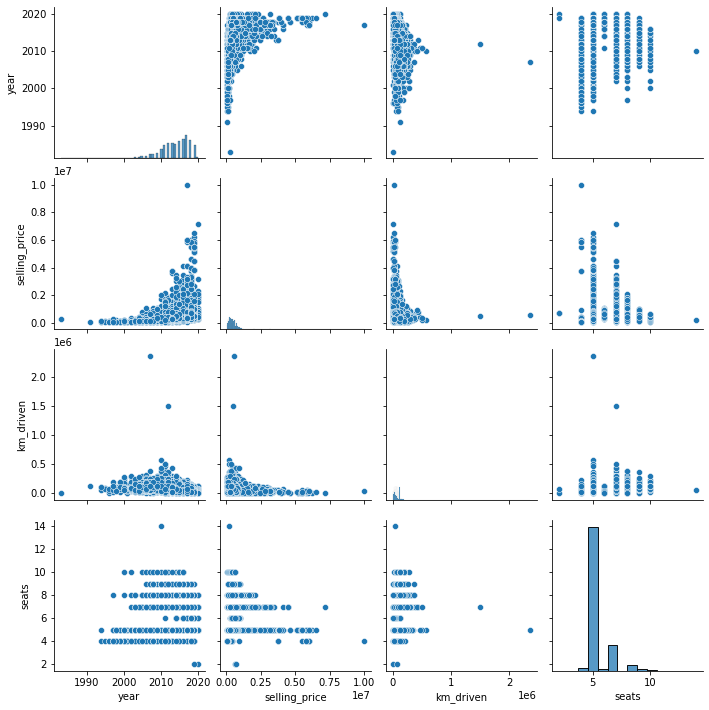

In [29]:
sns.pairplot(df)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [33]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [34]:
df.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [36]:
df = df.dropna()
df = df.drop_duplicates()

# Removing Unnecessary Columns
df = df[df["owner"] != "Test Drive Car"]
df.reset_index(drop=True, inplace=True)

In [37]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [38]:
df.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6712 entries, 0 to 6711
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6712 non-null   object 
 1   year           6712 non-null   int64  
 2   selling_price  6712 non-null   int64  
 3   km_driven      6712 non-null   int64  
 4   fuel           6712 non-null   object 
 5   seller_type    6712 non-null   object 
 6   transmission   6712 non-null   object 
 7   owner          6712 non-null   object 
 8   mileage        6712 non-null   object 
 9   engine         6712 non-null   object 
 10  max_power      6712 non-null   object 
 11  torque         6712 non-null   object 
 12  seats          6712 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 681.8+ KB


In [41]:
# Checking values in each categories 
print(df["fuel"].value_counts())
print(df["seller_type"].value_counts())
print(df["transmission"].value_counts())
print(df["owner"].value_counts())

Diesel    3657
Petrol    2969
CNG         51
LPG         35
Name: fuel, dtype: int64
Individual          6024
Dealer               661
Trustmark Dealer      27
Name: seller_type, dtype: int64
Manual       6141
Automatic     571
Name: transmission, dtype: int64
First Owner             4176
Second Owner            1888
Third Owner              493
Fourth & Above Owner     155
Name: owner, dtype: int64


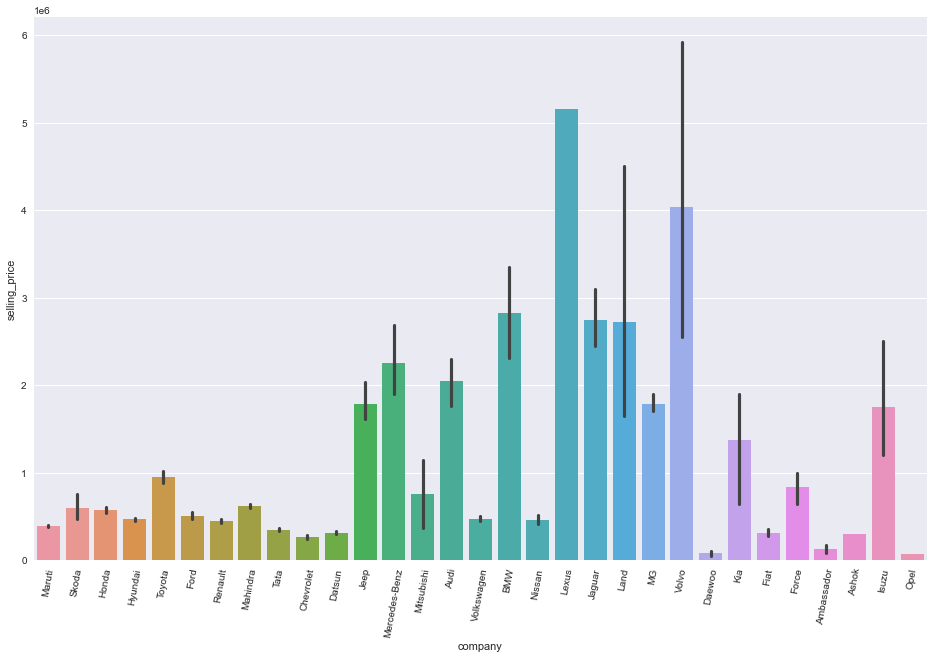

In [42]:
name = df["name"]
names = []

for i in range(len(name)):
    c = str(name[i]).split(" ")[0]
    names.append(c)
    
df["company"] = pd.DataFrame(names)

plt.figure(figsize = (16,10))
plot = sns.barplot(y='selling_price', x='company', data=df)
plt.setp(plot.get_xticklabels(), rotation=80)
plt.show()

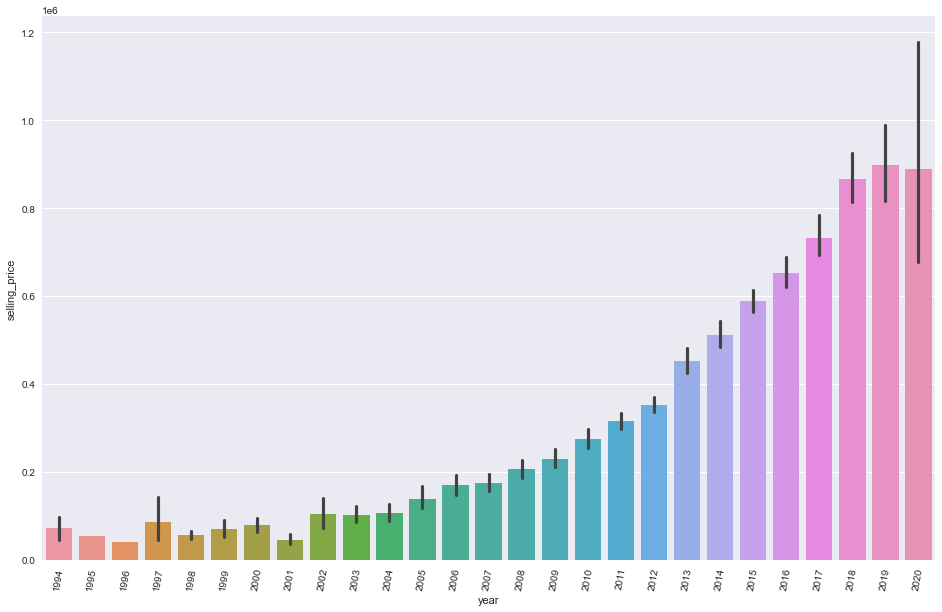

In [43]:
plt.figure(figsize = (16,10))
plot = sns.barplot(y='selling_price', x='year', data=df)
plt.setp(plot.get_xticklabels(), rotation=80)
plt.show()

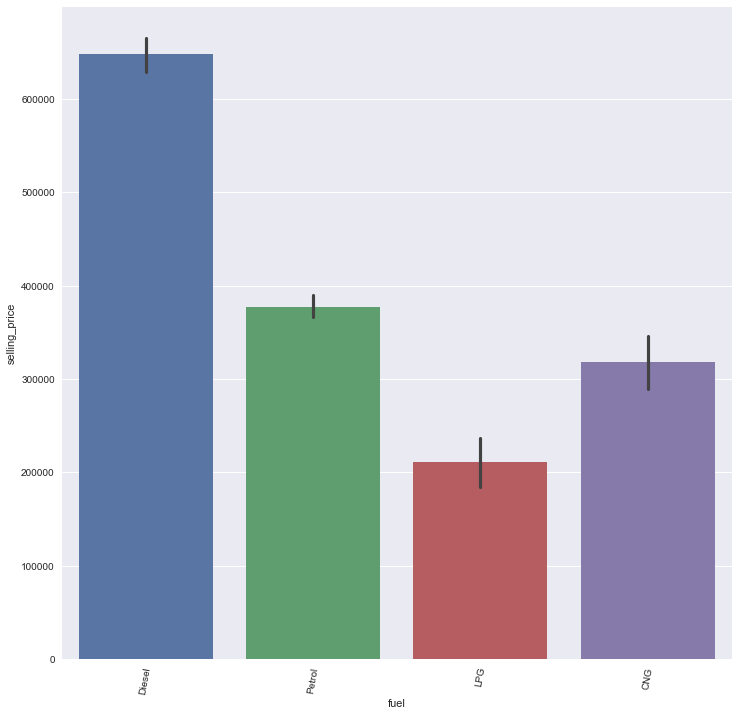

In [44]:
plt.figure(figsize = (12,12))
plot = sns.barplot(y='selling_price', x='fuel', data=df)
plt.setp(plot.get_xticklabels(), rotation=80)
plt.show()

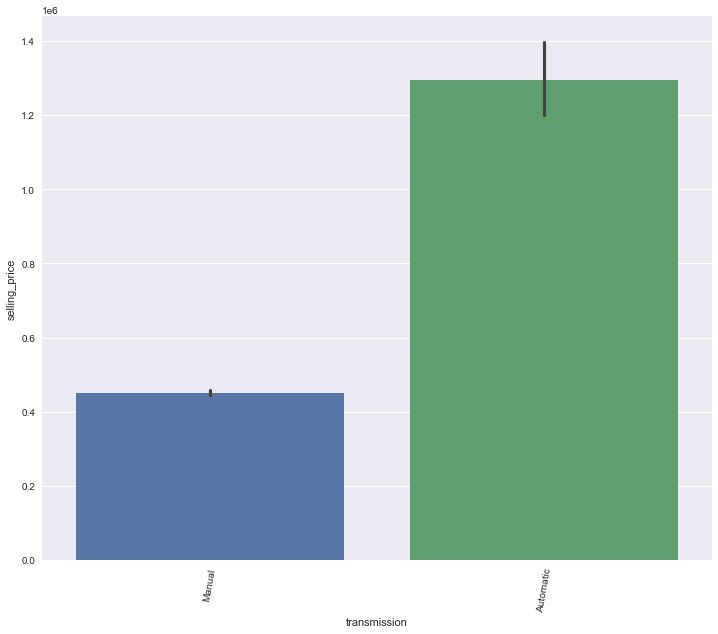

In [45]:
plt.figure(figsize = (12,10))
plot = sns.barplot(y='selling_price', x='transmission', data=df)
plt.setp(plot.get_xticklabels(), rotation=80)
plt.show()


<AxesSubplot:>

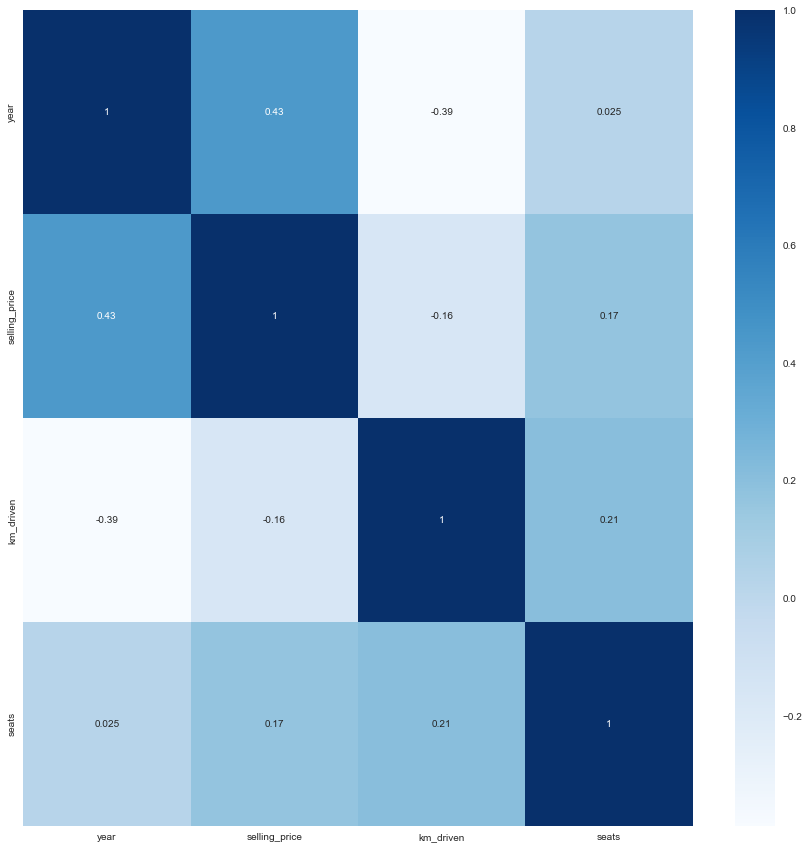

In [46]:
import seaborn as sns
plt.subplots(figsize=(15,15))
data = df.corr()
sns.heatmap(data, cmap ='Blues', annot=True, annot_kws={"size": 10})

                   year  selling_price  km_driven  mileage  engine  max_power
year           1.000000       0.431954  -0.387310      NaN     NaN        NaN
selling_price  0.431954       1.000000  -0.160260      NaN     NaN        NaN
km_driven     -0.387310      -0.160260   1.000000      NaN     NaN        NaN
seats          0.025496       0.165558   0.207655      NaN     NaN        NaN


----------------------CORRELATION MATRIX---------------------


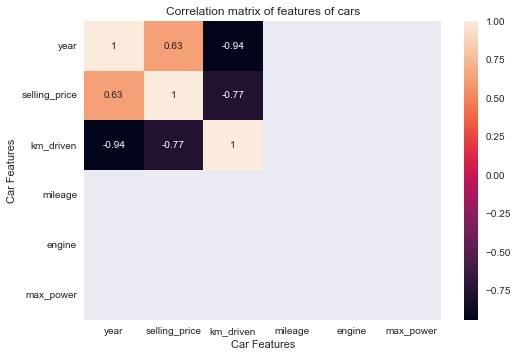

In [48]:
df = pd.DataFrame(data,columns=['year','selling_price','km_driven','mileage','engine','max_power'])
print (df)
print("\n")
print("----------------------CORRELATION MATRIX---------------------")
df.corr()

import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
df = pd.DataFrame(data,columns=['year','selling_price','km_driven','mileage','engine','max_power'])
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.title("Correlation matrix of features of cars")
plt.xlabel("Car Features")
plt.ylabel("Car Features")
plt.show()


In [51]:
# REGRESSION
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
X = np.array(df['km_driven']).reshape((-1,1))
Y = np.array(df['selling_price'])
model = LinearRegression().fit(X,Y)
R_sq = model.score(X,Y)
print("Coefficient of determination:" ,round(R_sq,4))
import math
R = math.sqrt(R_sq)
print("Coefficient of correlation:" ,round(R,4))

new_model = LinearRegression().fit(X, Y.reshape((-1,1)))
print(f"Regression equation: Y = {new_model.intercept_} + {new_model.coef_}X ")

pred_val = model.predict(X)
pred = pd.DataFrame({'X': X.flatten(), 'Actual (Y)': Y.flatten(), 'Predicted (Y)': pred_val.flatten()})
pred




Coefficient of determination: 0.5942
Coefficient of correlation: 0.7708
Regression equation: Y = [0.46199619] + [[-0.62224283]]X 


,X,Actual (Y),Predicted (Y)
0,-0.387310,0.431954,0.702997
1,-0.160260,1.000000,0.561717
2,1.000000,-0.160260,-0.160247
3,0.207655,0.165558,0.332785


----------------------REGRESSION LINE---------------------
              SUMMARY STATISTICS             


,year,selling_price,km_driven,seats
count,4.000000,4.000000,4.000000,4.000000
mean,0.267535,0.359313,0.165021,0.349677
std,0.591874,0.491004,0.608245,0.440486
min,-0.387310,-0.160260,-0.387310,0.025496
25%,-0.077706,0.084103,-0.217023,0.130542
50%,0.228725,0.298756,0.023697,0.186606
75%,0.573965,0.573965,0.405741,0.405741
max,1.000000,1.000000,1.000000,1.000000


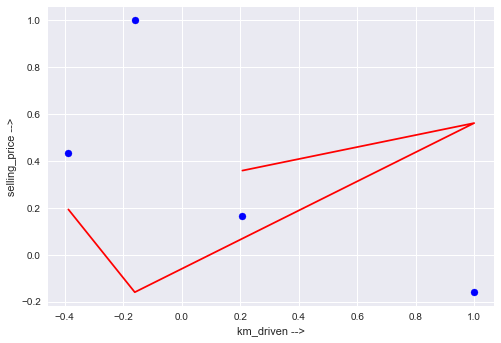

In [53]:
import matplotlib.pyplot as plt
print("----------------------REGRESSION LINE---------------------")
plt.scatter(x=df["km_driven"], y=df['selling_price'],marker="o",color="blue")
m, b = np.polyfit(df["km_driven"],df['selling_price'], 1)
plt.plot(df["km_driven"], m*df["selling_price"] + b,'red', label='Data points')
plt.xlabel('km_driven -->')
plt.ylabel('selling_price -->')

print("              SUMMARY STATISTICS             ")
data.describe()